In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("/Users/naoki/train.csv")

 # 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [3]:
X = housing[["GrLivArea", "YearBuilt"]]
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [4]:
y = housing["SalePrice"]
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

 # 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
y_pred =reg.predict(X_test)
print(reg.score(X_test, y_test))
print("切片：{}".format(reg.intercept_))
print("回帰係数：{}".format(reg.coef_))

0.5871035359601553
切片：180733.1497716894
回帰係数：[50915.49019418 31435.11963558]


In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

平均絶対誤差 (MAE):31844.32869713221
平均二乗誤差 (MSE):2725908099.0636377
二乗平均平方根誤差 (RMSE):52210.229831553486
決定係数 (R**2) :0.5871035359601553


In [8]:
import IPython

In [9]:
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib notebook

# fig=plt.figure()
# ax=Axes3D(fig)

# x1 = X_train[:,0]
# x2 = X_train[:,1]
# y = y_train

# ax.scatter3D(x1, x2, y)
# ax.set_xlabel("GrLivArea")
# ax.set_ylabel("YearBuilt")
# ax.set_zlabel("SalePrice")

# mesh_x1 = np.arange(x1.min(), x1.max(), (x1.max()-x1.min())/20)
# mesh_x2 = np.arange(x2.min(), x2.max(), (x2.max()-x2.min())/20)
# mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
# mesh_y = reg.coef_[0] * mesh_x1 + reg.coef_[1] * mesh_x2 + reg.intercept_
# ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y, color="red")
# plt.show()


In [10]:
y_pred.shape

(365,)

In [11]:
X_test

array([[ 1.92437550e+00, -4.63916261e-01],
       [ 1.10039797e-01, -9.93864289e-01],
       [-6.16081750e-01, -6.95768523e-01],
       [ 9.69767708e-01,  1.98518773e-01],
       [-8.31013728e-01, -2.11737226e-04],
       [-9.66556417e-01, -2.02063859e+00],
       [-1.10701153e-01,  1.19217132e+00],
       [-2.83034000e-01, -1.12635130e+00],
       [ 5.72150711e+00,  8.27832056e-01],
       [-8.11650487e-01,  1.09280607e+00],
       [-3.27569455e-01,  1.15904957e+00],
       [ 3.07544858e-01,  1.65397021e-01],
       [ 8.94251068e-01,  9.27197311e-01],
       [-1.20278796e+00, -1.32698744e-01],
       [-8.50376969e-01, -7.62012027e-01],
       [-4.01149772e-01, -4.63916261e-01],
       [ 7.78071620e-01,  6.95345049e-01],
       [-1.02851879e+00,  7.61588552e-01],
       [-5.67673647e-01, -1.65820496e-01],
       [ 5.90248180e-01, -1.85502983e+00],
       [-2.63670759e-01, -6.29525020e-01],
       [-1.30347681e+00,  1.09280607e+00],
       [-1.36543919e+00, -2.65185751e-01],
       [-7.

MSE : 2725908099.0636377


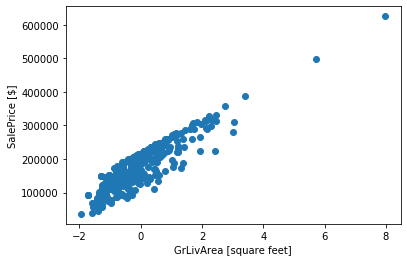

In [12]:
mse_list = []
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_list.append(mean_squared_error(y_test, y_pred))
print("MSE : {}".format(mse_list[-1]))

# plt.title("predicted SalePrice, GrLivArea, {}".format(model_name))
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:,0], y_pred)
plt.show()

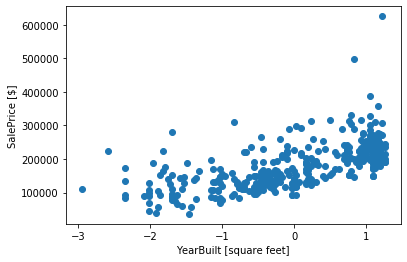

In [13]:
# plt.title("predicted SalePrice, GrLivArea, {}".format(model_name))
plt.xlabel("YearBuilt [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:,1], y_pred)
plt.show()

# 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

 - 線形回帰
 - SVM
 - 決定木
 - ランダムフォレスト

In [14]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [15]:
X = housing[["GrLivArea", "YearBuilt"]]
y = housing["SalePrice"]
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [16]:
sc = StandardScaler()
X = sc.fit_transform(X)

models = {"LinearRegression": LinearRegression(),
              "SVR": SVR(), 
              "DecisionTreeRegressor": DecisionTreeRegressor(), 
              "RandomForestRegressor": RandomForestRegressor()}


cross_val_score_list = []
mean_absolute_error_list = []
mean_squared_erro_listr = []
sqrt_mean_squared_error_list = []
r2_score_list = []

for i in models.values():
    reg = i.fit(X_train, y_train)
    y_pred =reg.predict(X_test)
    cross_val_score_list.append(cross_val_score(reg, X, y,  cv=5).mean())
    mean_absolute_error_list.append(mean_absolute_error(y_test, y_pred))
    mean_squared_erro_listr.append(mean_squared_error(y_test, y_pred))
    sqrt_mean_squared_error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_score_list.append(r2_score(y_test, y_pred))
    
pd.DataFrame({
                   "交差検証法(平均)":cross_val_score_list, 
                   "平均絶対誤差 (MAE)":mean_absolute_error_list, 
                   "平均二乗誤差 (MSE)":mean_squared_erro_listr, 
                   "二乗平均平方根誤差 (RMSE)":sqrt_mean_squared_error_list, 
                   "決定係数 (R**2)":r2_score_list },
                  index=models.keys())
    

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/si

,交差検証法(平均),平均絶対誤差 (MAE),平均二乗誤差 (MSE),二乗平均平方根誤差 (RMSE),決定係数 (R**2)
LinearRegression,0.647501,31844.328697,2.725908e+09,52210.229832,0.587104
SVR,-0.049108,55234.412738,6.962338e+09,83440.623619,-0.054593
DecisionTreeRegressor,0.546002,36107.252968,3.192208e+09,56499.627048,0.516473
RandomForestRegressor,0.709397,29217.850254,1.866138e+09,43198.823318,0.717334


In [17]:
X.shape

(1460, 2)

Linear Regression
MSE : 2725908099.0636377


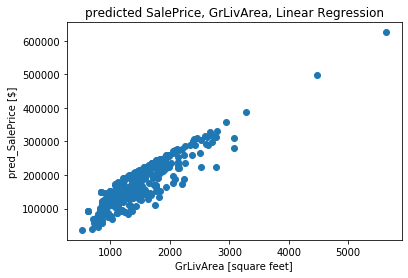

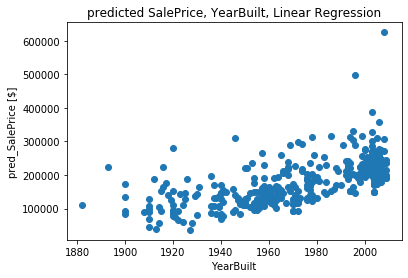

SVM
MSE : 6962337669.872041


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


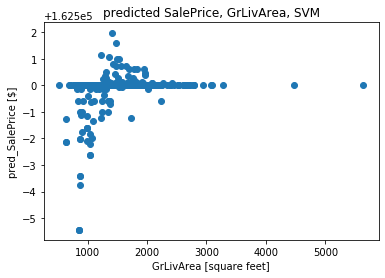

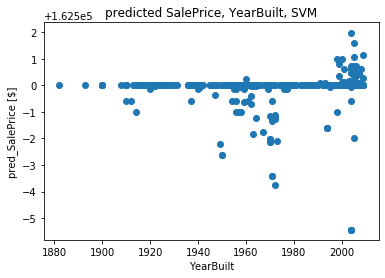

Decision Tree
MSE : 3194745118.303501


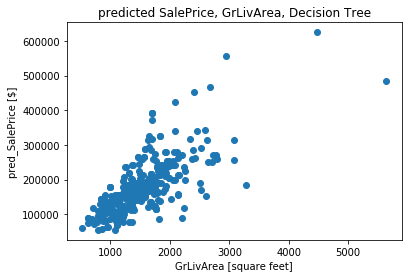

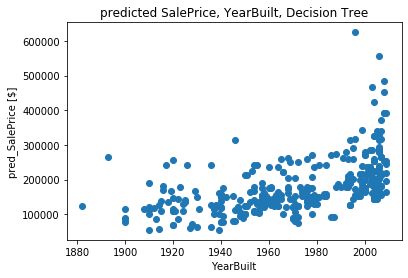

Random Forest
MSE : 2155349731.766162


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


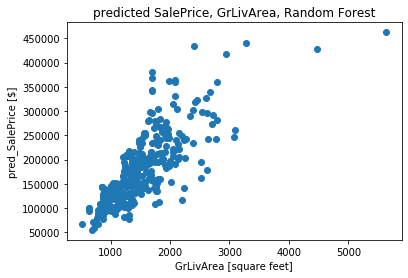

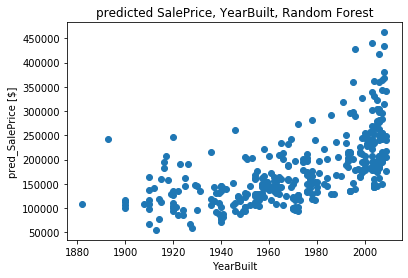

In [18]:

linear_reg = LinearRegression()
svr = SVR()
tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

models = [linear_reg, svr, tree, random_forest]
model_names = ["Linear Regression", "SVM", "Decision Tree", "Random Forest"]
mse_list = []

for model, model_name in zip(models, model_names):
    print(model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_list.append(mean_squared_error(y_test, y_pred))
    print("MSE : {}".format(mse_list[-1]))

    plt.title("predicted SalePrice, GrLivArea, {}".format(model_name))
    plt.xlabel("GrLivArea [square feet]")
    plt.ylabel("pred_SalePrice [$]")
    plt.scatter(X_test["GrLivArea"], y_pred)
    plt.show()

    plt.title("predicted SalePrice, YearBuilt, {}".format(model_name))
    plt.xlabel("YearBuilt")
    plt.ylabel("pred_SalePrice [$]")
    plt.scatter(X_test["YearBuilt"], y_pred)
    plt.show()

- SVR以外は「GrLivArea(説明変数)」とy_predの相関が見られる。一方、いずれのモデルも「YearBuilt(説明変数)」とy_predの相関は見られない。
- 「交差検証法による平均値」「平均絶対誤差」「平均二乗誤差」「二乗平均平方根誤差」「決定係数」のいずれの指標をみても、ランダムフォレストの精度が最も良い

 ## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

Kaggleのカーネルも参考にできます。

In [19]:
housing = pd.read_csv("/Users/naoki/train.csv")

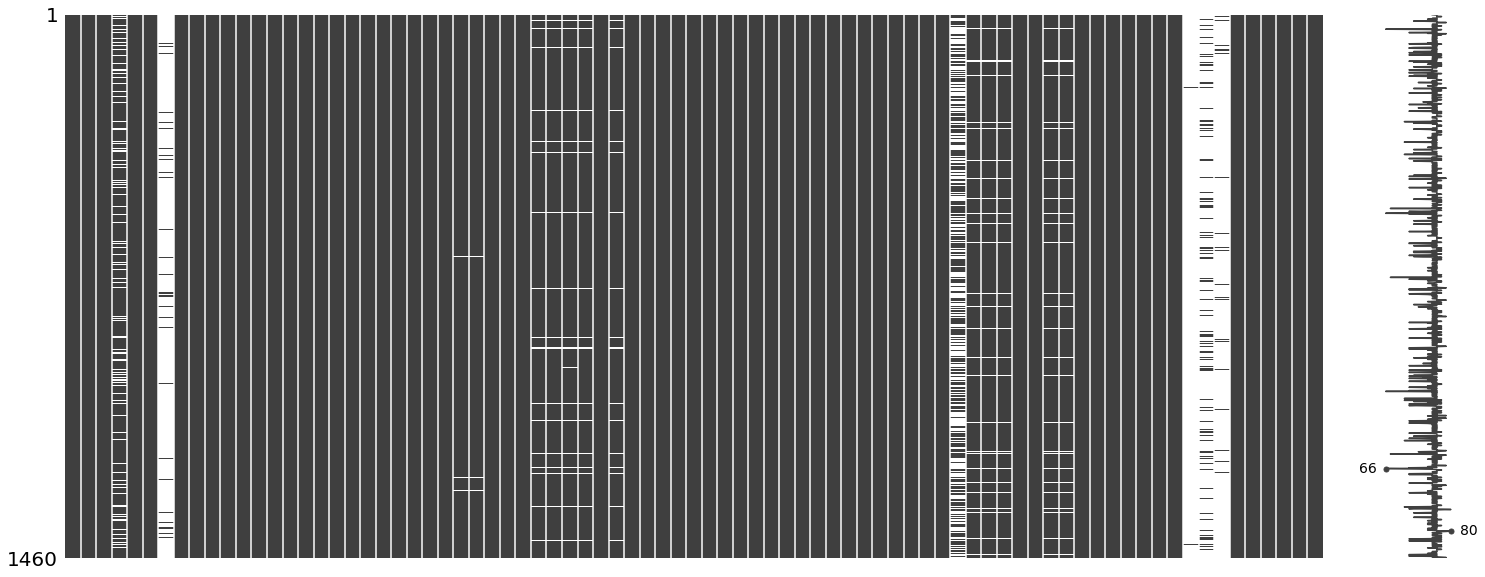

In [20]:
import missingno as msno
%matplotlib inline
msno.matrix(housing)

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [22]:
list_i = []

for i in housing.columns:
    if housing[i].dtypes =='int64':
        list_i.append(i)

In [23]:
housing_int = housing[list_i]
# msno.matrix(housing_int)

In [24]:
list_o = []

for i in housing.columns:
    if housing[i].dtypes == "O":
        list_o.append(i)


In [25]:
housing_object = housing[list_o]
# msno.matrix(housing_object)

In [26]:
housing_o_dummy = pd.get_dummies(housing_object)

In [27]:
housing_o_dummy.shape

(1460, 252)

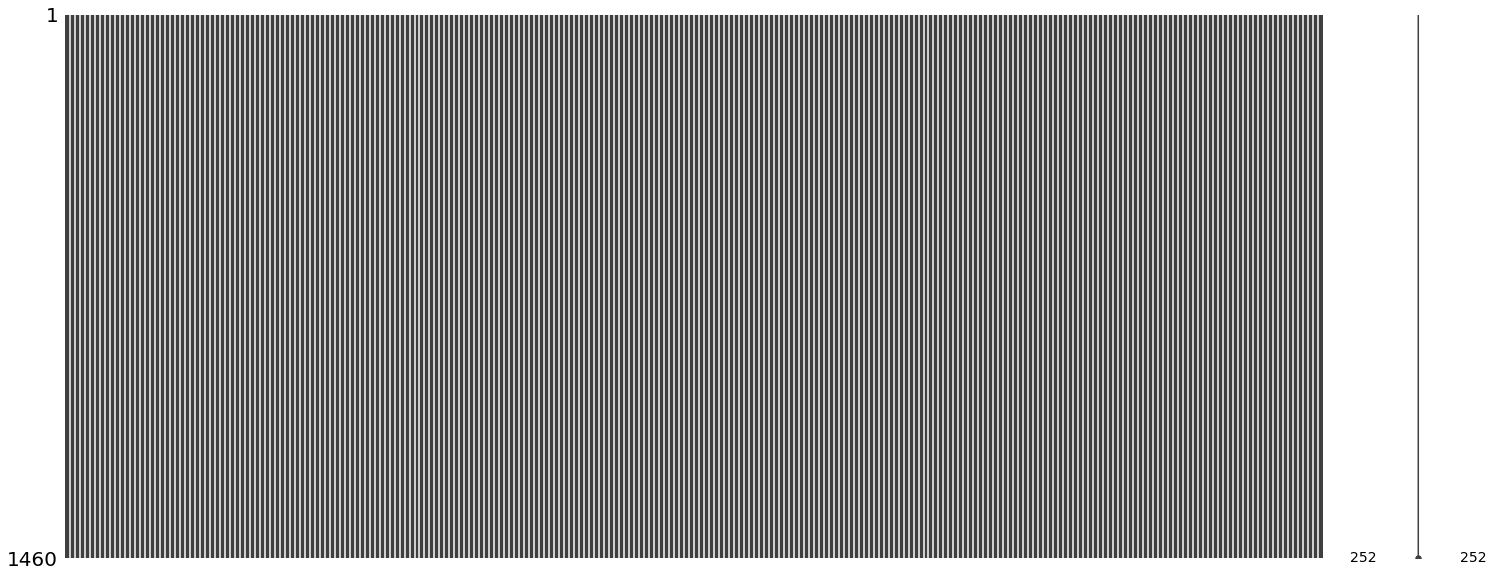

In [28]:
msno.matrix(housing_o_dummy)

In [29]:
housing_mix = pd.concat([housing_int, housing_o_dummy], axis=1)

In [30]:
housing_mix.isna().sum()

Id                       0
MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 287, dtype: int64

In [31]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

In [32]:
len(housing_mix)

1460

In [33]:
X = housing_mix.drop(["SalePrice"],axis=1)
y = housing_mix["SalePrice"]

In [34]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)


In [35]:
sc = StandardScaler()
X = sc.fit_transform(X)

models = {"LinearRegression": LinearRegression(),
              "SVR": SVR(), 
              "DecisionTreeRegressor": DecisionTreeRegressor(), 
              "RandomForestRegressor": RandomForestRegressor()}


cross_val_score_list = []
mean_absolute_error_list = []
mean_squared_erro_listr = []
sqrt_mean_squared_error_list = []
r2_score_list = []

for i in models.values():
    reg = i.fit(X_train, y_train)
    y_pred =reg.predict(X_test)
    cross_val_score_list.append(cross_val_score(reg, X, y,  cv=5).mean())
    mean_absolute_error_list.append(mean_absolute_error(y_test, y_pred))
    mean_squared_erro_listr.append(mean_squared_error(y_test, y_pred))
    sqrt_mean_squared_error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_score_list.append(r2_score(y_test, y_pred))
    
pd.DataFrame({
                   "交差検証法(平均)":cross_val_score_list, 
                   "平均絶対誤差 (MAE)":mean_absolute_error_list, 
                   "平均二乗誤差 (MSE)":mean_squared_erro_listr, 
                   "二乗平均平方根誤差 (RMSE)":sqrt_mean_squared_error_list, 
                   "決定係数 (R**2)":r2_score_list },
                  index=models.keys())

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/si

,交差検証法(平均),平均絶対誤差 (MAE),平均二乗誤差 (MSE),二乗平均平方根誤差 (RMSE),決定係数 (R**2)
LinearRegression,-5.894162e+25,22056.081242,2.915816e+09,53998.292666,0.558338
SVR,-5.142836e-02,55234.660081,6.962360e+09,83440.755645,-0.054597
DecisionTreeRegressor,7.287434e-01,24869.369863,1.798868e+09,42413.063953,0.727523
RandomForestRegressor,8.436961e-01,18860.562466,1.227184e+09,35031.185517,0.814117


 - 全ての特徴量を使用した結果、ランダムフォレスト以外のモデルではMSEが向上した。
 - 決定係数をみると、SVR以外のモデルで向上が見られる。

 # 他のモデルも試してみる

In [42]:
X = housing_mix.drop(["SalePrice"],axis=1)
y = housing_mix["SalePrice"]

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
reg = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

交差検証法：[0.85611106 0.89498895 0.92311566 0.78864022 0.88797559 0.8844429
 0.88759526 0.88133517 0.79257791 0.85436539]
交差検証法(平均)：0.8661414473189698
平均絶対誤差 (MAE):16929.078684931505
平均二乗誤差 (MSE):968735015.1715878
二乗平均平方根誤差 (RMSE):31124.50827196452
決定係数 (R**2) :0.8532645827299419


In [38]:
len(reg.feature_importances_)

286

In [43]:
importance = reg.feature_importances_.reshape(286,1)

In [44]:
column = np.array(X.columns).reshape(286,1)

In [45]:
feature = pd.DataFrame(np.hstack([column,importance]), columns=["columns", "inportance"])

In [46]:
feature_sorted = feature.sort_values('inportance', ascending=False).reset_index()
feature_sorted = feature_sorted.drop("index", axis=1)
feature_sorted.head()

,columns,inportance
0,OverallQual,0.570428
1,GrLivArea,0.113006
2,TotalBsmtSF,0.0393865
3,BsmtFinSF1,0.0374381
4,GarageArea,0.0273864


In [47]:
feature_sorted["inportance"] =feature_sorted["inportance"].astype('float64')

In [48]:
list_col = []

for i in range(len(feature_sorted)):
    a = feature_sorted.iloc[i,0]
    b = feature_sorted.iloc[i,1]
    if b >= 0.008:
        list_col.append(a)

In [49]:
list_col

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'GarageArea',
 'GarageCars',
 '1stFlrSF',
 '2ndFlrSF',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd']

In [50]:
X = X[list_col]

In [51]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)


In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
reg = RandomForestRegressor(n_estimators=100,random_state=0,max_depth=None).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
交差検証法：[0.85072791 0.87729001 0.91950815 0.7410362  0.89341594 0.87062632
 0.87268506 0.88482837 0.84840537 0.85561119]
交差検証法(平均)：0.8614134530746294
平均絶対誤差 (MAE):17663.933514155247
平均二乗誤差 (MSE):900874883.5102926
二乗平均平方根誤差 (RMSE):30014.57784994306
決定係数 (R**2) :0.8635434356457286


In [54]:
reg = RandomForestRegressor(n_estimators=1000,random_state=0).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y,  cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
交差検証法：[0.85445234 0.87956837 0.92052753 0.74728742 0.89657632 0.87095069
 0.87043222 0.88454677 0.84713581 0.85441057]
交差検証法(平均)：0.8625888058485529
平均絶対誤差 (MAE):17451.05428793216
平均二乗誤差 (MSE):836155494.2433413
二乗平均平方根誤差 (RMSE):28916.35340500841
決定係数 (R**2) :0.8733465566652237


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
X = housing_mix.drop(["SalePrice"],axis=1)
y = housing_mix["SalePrice"]
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [57]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
reg = GradientBoostingRegressor().fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
交差検証法：[0.8984773  0.8926378  0.93628569 0.78015923 0.90719026 0.897702
 0.88932315 0.90732582 0.90418951 0.87720778]
交差検証法(平均)：0.891206394665474
平均絶対誤差 (MAE):16573.088201456947
平均二乗誤差 (MSE):699479364.8323135
二乗平均平方根誤差 (RMSE):26447.672200636363
決定係数 (R**2) :0.8940490486427964


In [59]:
len(reg.feature_importances_)

286

In [60]:
importance = reg.feature_importances_.reshape(len(reg.feature_importances_),1)
column = np.array(X.columns).reshape(len(reg.feature_importances_),1)
feature = pd.DataFrame(np.hstack([column,importance]), columns=["columns", "inportance"])
feature_sorted = feature.sort_values('inportance', ascending=False).reset_index()
feature_sorted = feature_sorted.drop("index", axis=1)
feature_sorted.head()

,columns,inportance
0,OverallQual,0.51896
1,GrLivArea,0.149026
2,GarageCars,0.0483947
3,TotalBsmtSF,0.0445198
4,BsmtFinSF1,0.0350351


In [61]:
feature_sorted["inportance"] =feature_sorted["inportance"].astype('float64')

In [62]:
list_col = []
for i in range(len(feature_sorted)):
    a = feature_sorted.iloc[i,0]
    b = feature_sorted.iloc[i,1]
    if b >= 0.008:
        list_col.append(a)

In [63]:
list_col

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'LotArea',
 'YearRemodAdd',
 'YearBuilt',
 'Fireplaces',
 '2ndFlrSF',
 'BsmtQual_Ex']

In [64]:
X = X[list_col]

In [65]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [66]:
X_train

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,BsmtFinSF1,1stFlrSF,LotArea,YearRemodAdd,YearBuilt,Fireplaces,2ndFlrSF,BsmtQual_Ex
1292,5,2372,1,994,0,1378,6600,1965,1892,0,994,0
1018,7,1472,2,384,0,802,10784,1992,1991,1,670,0
1213,4,960,1,648,648,960,10246,2001,1965,0,0,0
1430,5,1838,2,732,0,734,21930,2005,2005,1,1104,0
810,6,1309,2,1040,663,1309,10140,1999,1974,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,8,2365,3,1252,1163,1268,9430,1999,1999,1,1097,0
835,4,1067,2,1067,442,1067,9600,1995,1950,0,0,0
1216,6,1902,2,0,0,1318,8930,1978,1978,0,584,0
559,7,1557,2,1374,0,1557,3196,2004,2003,1,0,0


In [67]:
pd.DataFrame(y_train).info

<bound method DataFrame.info of       SalePrice
1292     107500
1018     160000
1213     145000
1430     192140
810      181000
...         ...
763      337000
835      128000
1216     112000
559      234000
684      221000

[1095 rows x 1 columns]>

In [68]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
reg = GradientBoostingRegressor(n_estimators=100,random_state=0,max_depth=3).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
交差検証法：[0.89427182 0.88714951 0.91987706 0.74448479 0.90985123 0.88074851
 0.86983266 0.89438136 0.90583415 0.87360333]
交差検証法(平均)：0.8780034418149942
平均絶対誤差 (MAE):16852.229184221032
平均二乗誤差 (MSE):636434234.1706945
二乗平均平方根誤差 (RMSE):25227.64820927021
決定係数 (R**2) :0.9035985677678375


In [70]:
reg = GradientBoostingRegressor(n_estimators=1000,random_state=0,max_depth=3).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
交差検証法：[0.87913594 0.8791446  0.91370224 0.73023101 0.91028582 0.89039133
 0.87883506 0.887368   0.89579724 0.8550978 ]
交差検証法(平均)：0.8719989028444773
平均絶対誤差 (MAE):17572.78383950018
平均二乗誤差 (MSE):704725900.1541332
二乗平均平方根誤差 (RMSE):26546.673994196208
決定係数 (R**2) :0.8932543498473441


In [71]:
import xgboost as xgb
# モデルのインスタンス作成

In [72]:
X = housing_mix.drop(["SalePrice"],axis=1)
y = housing_mix["SalePrice"]
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)


In [73]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
import xgboost as xgb
reg = xgb.XGBRegressor().fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

[13:05:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
[13:05:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
交差検証法：[0.89694872 0.9067913  0.92857679 0.78226313 0.89653857 0.8864645
 0.84864118 0.91873987 0.88838145 0.86695808]
[13:05:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
交差検証法(平均)：0.8820303578823655
平均絶対誤差 (MAE):16069.801391267123
平均二乗誤差 (MSE):692241248.4523152
二乗平均平方根誤差 (RMSE):26310.477921396927
決定係数 (R**2) :0.8951454145329879


In [75]:
importance = reg.feature_importances_.reshape(286,1)
column = np.array(X.columns).reshape(286,1)
feature = pd.DataFrame(np.hstack([column,importance]), columns=["columns", "inportance"])
feature_sorted = feature.sort_values('inportance', ascending=False).reset_index()
feature_sorted = feature_sorted.drop("index", axis=1)
feature_sorted.head()

,columns,inportance
0,OverallQual,0.283047
1,GarageCars,0.107709
2,BsmtQual_Ex,0.067105
3,GrLivArea,0.0416543
4,GarageType_Attchd,0.0387394


In [76]:
feature_sorted["inportance"] =feature_sorted["inportance"].astype('float64')

In [77]:
list_col = []
for i in range(len(feature_sorted)):
    a = feature_sorted.iloc[i,0]
    b = feature_sorted.iloc[i,1]
    if b >= 0.008:
        list_col.append(a)

In [78]:
X = X[list_col]

In [79]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [80]:
from sklearn.neighbors import LocalOutlierFactor ## 外れ値の除外
local_outlier_factor = LocalOutlierFactor(contamination='auto', novelty=True, n_neighbors=15)
local_outlier_factor.fit(X_train[1:])
predicted = local_outlier_factor.predict(X_train[1:])
print(local_outlier_factor)
Outlier = np.argwhere(predicted == -1) #外れ値のあるインデックス
a = [i for i in Outlier.reshape(1,Outlier.shape[0])]
print("外れ値の数:{}".format(len(Outlier)))
X_train = X_train.drop(index=X_train.index[a])
y_train = y_train.drop(index=y_train.index[a])

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=15, novelty=True, p=2)
外れ値の数:78


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [81]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
reg = xgb.XGBRegressor(n_estimators=100, max_depth=3).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

[13:05:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
[13:05:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


交差検証法：[0.86790773 0.86680673 0.90545233 0.72979422 0.91147291 0.88358172
 0.91181709 0.89569444 0.92369387 0.87186948]
[13:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
交差検証法(平均)：0.8768090509650645
平均絶対誤差 (MAE):17046.36346318493
平均二乗誤差 (MSE):635760230.5468267
二乗平均平方根誤差 (RMSE):25214.286239091256
決定係数 (R**2) :0.9037006598791382


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [83]:
reg = xgb.XGBRegressor(n_estimators=1000, max_depth=3).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

[13:05:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
[13:05:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:05:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
交差検証法：[0.84624375 0.85728521 0.9036984  0.71128849 0.91103511 0.88940942
 0.92310626 0.87748381 0.91459673 0.88333965]
[13:06:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:06:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
交差検証法(平均)：0.8717486827272178
平均絶対誤差 (MAE):18006.807716181505
平均二乗誤差 (MSE):748162883.548481
二乗平均平方根誤差 (RMSE):27352.566306445195
決定係数 (R**2) :0.8866748995503058


In [84]:
X = housing_mix.drop(["SalePrice"],axis=1)
y = housing_mix["SalePrice"]
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)


In [85]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
import lightgbm as lgb

In [87]:
reg = lgb.LGBMRegressor().fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
交差検証法：[0.87685204 0.90674741 0.91392947 0.75974244 0.88330951 0.88745955
 0.87987021 0.91480107 0.79724775 0.87256091]
交差検証法(平均)：0.869252035983197
平均絶対誤差 (MAE):16418.702083062777
平均二乗誤差 (MSE):973268660.7087163
二乗平均平方根誤差 (RMSE):31197.25405718773
決定係数 (R**2) :0.8525778661777098


In [88]:
importance = reg.feature_importances_.reshape(len(reg.feature_importances_),1)
column = np.array(X.columns).reshape(len(reg.feature_importances_),1)
feature = pd.DataFrame(np.hstack([column,importance]), columns=["columns", "inportance"])
feature_sorted = feature.sort_values('inportance', ascending=False).reset_index()
feature_sorted = feature_sorted.drop("index", axis=1)
feature_sorted.head()

,columns,inportance
0,GrLivArea,282
1,LotArea,216
2,TotalBsmtSF,175
3,1stFlrSF,169
4,GarageArea,169


In [89]:
feature_sorted["inportance"] =feature_sorted["inportance"].astype('float64')

In [90]:
list_col = []
for i in range(len(feature_sorted)):
    a = feature_sorted.iloc[i,0]
    b = feature_sorted.iloc[i,1]
    if b >= 0.008:
        list_col.append(a)

In [91]:
X = X[list_col]

In [92]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [93]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [94]:
reg = lgb.LGBMRegressor(n_estimators=100, max_depth=5).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=5,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
交差検証法：[0.88287545 0.90736657 0.91385404 0.7832131  0.88313314 0.90364462
 0.89447983 0.91750519 0.80998895 0.87539765]
交差検証法(平均)：0.877145854554889
平均絶対誤差 (MAE):15874.945650804946
平均二乗誤差 (MSE):846097161.0797946
二乗平均平方根誤差 (RMSE):29087.749329911978
決定係数 (R**2) :0.8718406808490713


In [95]:
reg = lgb.LGBMRegressor(n_estimators=1000, max_depth=3).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=3,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
交差検証法：[0.88398462 0.91690231 0.90067082 0.80096426 0.86284268 0.89326126
 0.8980622  0.90083521 0.84150491 0.87287281]
交差検証法(平均)：0.8771901082936182
平均絶対誤差 (MAE):16729.865148241235
平均二乗誤差 (MSE):774073527.7958095
二乗平均平方根誤差 (RMSE):27822.176906126693
決定係数 (R**2) :0.8827501841887015
